#**PRT RESULT PREDICTION**

#**PROJECT DESCRIPTION:**

 **Build a simple ML model (classification model) to predict the 'Result' of the students who appeared for the Placement Readiness Test held on 2nd june, 2024 for Data Science and AI.**

**DATA DESCRIPTIOM**

The dataset contains the following columns:

**Email:** Email addresses of the individuals.

**Python Marks:** Marks obtained in Python.

**Python %:** Percentage score in Python.

**Stats and ML Marks:** Marks obtained in Statistics and Machine Learning.

**Stats and ML %:** Percentage score in Statistics and Machine Learning.

**SQL Marks:** Marks obtained in SQL.

**SQL %:** Percentage score in SQL.

**Result:** Pass or Fail result based on the marks.

**Python Feedback:** Feedback on Python.

**SQL Feedback:** Feedback on SQL.

#**STEPS INCLUDED**

**1) Clean the dataset.**

**2) Encode the categorical variables.**

**3) Split the dataset into training and testing sets.**

**4) Train a machine learning model.**

**5) Evaluate the model.**

In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.feature_selection import RFE

In [52]:
data = pd.read_csv("/content/PRT DS 2 June - Evaluation.csv")

In [53]:
data

,Email,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result,Python Feedback,SQL Feedback
0,ankit.tiwari@intellipaat.com,0,0,0,0,0,0,Fail,IP,IP
1,nikhilblood3333@gmail.com,0,0,0,0,0,0,Fail,No submissions in both LMS and Mail,no submision
2,abhishekchatterjee.c@gmail.com,2,100,3,75,0,0,Fail,I am pleased to share that you have a strong f...,AI generated content
3,ashwal.vishwanathintellipaat@outlook.com,0,0,0,0,0,0,Fail,IP,IP
4,kavya.d@intellipaat.in,0,0,0,0,0,0,Fail,IP,IP
...,...,...,...,...,...,...,...,...,...,...
140,nandinisharma39900@gmail.com,1,50,3,75,4,80,Pass,"q1-incorrect output, q6-not attempted",3 incorrect logic was used
141,muruga.g@gmail.com,0,0,0,0,0,0,Fail,no submission,no submission
142,arorapunit88@gmail.com,1,50,4,100,1,20,Fail,q1-no submission,1 incorrect syntax was used that will not exec...
143,vineelsuper@gmail.com,0,0,0,0,0,0,Fail,incorrect file submitted,Answers that were given were not part of this prt


In [54]:
data.head()

,Email,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result,Python Feedback,SQL Feedback
0,ankit.tiwari@intellipaat.com,0,0,0,0,0,0,Fail,IP,IP
1,nikhilblood3333@gmail.com,0,0,0,0,0,0,Fail,No submissions in both LMS and Mail,no submision
2,abhishekchatterjee.c@gmail.com,2,100,3,75,0,0,Fail,I am pleased to share that you have a strong f...,AI generated content
3,ashwal.vishwanathintellipaat@outlook.com,0,0,0,0,0,0,Fail,IP,IP
4,kavya.d@intellipaat.in,0,0,0,0,0,0,Fail,IP,IP


In [55]:
data.tail()

,Email,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result,Python Feedback,SQL Feedback
140,nandinisharma39900@gmail.com,1,50,3,75,4,80,Pass,"q1-incorrect output, q6-not attempted",3 incorrect logic was used
141,muruga.g@gmail.com,0,0,0,0,0,0,Fail,no submission,no submission
142,arorapunit88@gmail.com,1,50,4,100,1,20,Fail,q1-no submission,1 incorrect syntax was used that will not exec...
143,vineelsuper@gmail.com,0,0,0,0,0,0,Fail,incorrect file submitted,Answers that were given were not part of this prt
144,vpnpsrajawat2017@gmail.com,0,0,0,0,0,0,Fail,no submission,no submission


In [56]:
data.shape

(145, 10)

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Email               145 non-null    object
 1   Python Marks        145 non-null    int64 
 2   Python %            145 non-null    int64 
 3   Stats and ML Marks  145 non-null    int64 
 4   Stats and ML %      145 non-null    int64 
 5   SQL Marks           145 non-null    int64 
 6   SQL %               145 non-null    int64 
 7   Result              145 non-null    object
 8   Python Feedback     145 non-null    object
 9   SQL Feedback        145 non-null    object
dtypes: int64(6), object(4)
memory usage: 11.5+ KB


In [58]:
data.describe()

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %
count,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,0.917241,45.862069,2.296552,57.413793,1.379310,27.586207
std,0.845769,42.288464,1.712390,42.809751,1.752256,35.045127
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,50.000000,3.000000,75.000000,0.000000,0.000000
75%,2.000000,100.000000,4.000000,100.000000,3.000000,60.000000
max,2.000000,100.000000,4.000000,100.000000,5.000000,100.000000


In [59]:
# Dropping unnecessary columns
data = data.drop(columns=['Email', 'Python Feedback', 'SQL Feedback'])

In [60]:
data

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result
0,0,0,0,0,0,0,Fail
1,0,0,0,0,0,0,Fail
2,2,100,3,75,0,0,Fail
3,0,0,0,0,0,0,Fail
4,0,0,0,0,0,0,Fail
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,Pass
141,0,0,0,0,0,0,Fail
142,1,50,4,100,1,20,Fail
143,0,0,0,0,0,0,Fail


In [61]:
# Encoding the categorical 'Result' column
label_encoder = LabelEncoder()
data['Result'] = label_encoder.fit_transform(data['Result'])

In [62]:
data

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,2,100,3,75,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,1
141,0,0,0,0,0,0,0
142,1,50,4,100,1,20,0
143,0,0,0,0,0,0,0


In [63]:
# Splitting the data into features and target variable
X = data.drop(columns=['Result'])
y = data['Result']

In [64]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [65]:
X_train

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %
9,0,0,1,25,0,0
4,0,0,0,0,0,0
26,2,100,4,100,0,0
120,1,50,4,100,0,0
125,2,100,4,100,4,80
...,...,...,...,...,...,...
71,0,0,0,0,2,40
106,2,100,3,75,4,80
14,2,100,4,100,3,60
92,2,100,4,100,4,80


In [66]:
X_test

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %
69,0,0,0,0,0,0
140,1,50,3,75,4,80
27,0,0,4,100,0,0
19,0,0,0,0,0,0
42,0,0,1,25,0,0
117,1,50,2,50,0,0
126,2,100,4,100,4,80
108,2,100,4,100,4,80
84,2,100,4,100,4,80
18,2,100,4,100,0,0


In [67]:
y_train

9      0
4      0
26     0
120    0
125    1
      ..
71     0
106    1
14     1
92     1
102    0
Name: Result, Length: 116, dtype: int64

In [68]:
y_test

69     0
140    1
27     0
19     0
42     0
117    0
126    1
108    1
84     1
18     0
12     0
55     0
128    0
78     0
73     1
36     1
112    0
133    0
100    0
101    0
94     0
136    0
11     1
66     0
31     0
45     0
51     0
76     1
111    0
Name: Result, dtype: int64

#**LOGISTIC REGRESSION MODEL**

In [69]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [70]:
# Predicting the results on the test set
y_pred1 = lr.predict(X_test)

In [71]:
y_pred1

array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0])

In [72]:
y_test

69     0
140    1
27     0
19     0
42     0
117    0
126    1
108    1
84     1
18     0
12     0
55     0
128    0
78     0
73     1
36     1
112    0
133    0
100    0
101    0
94     0
136    0
11     1
66     0
31     0
45     0
51     0
76     1
111    0
Name: Result, dtype: int64

In [73]:
cm = confusion_matrix(y_test,y_pred1)
cm

array([[21,  0],
       [ 0,  8]])

In [74]:
lr_acc = accuracy_score(y_test,y_pred1)
lr_acc

1.0

#**RANDOM FOREST MODEL**

In [75]:
# Training a Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
# Predicting the results on the test set
y_pred = model.predict(X_test)

In [77]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[21,  0],
       [ 0,  8]])

In [78]:
accuracy_score(y_test,y_pred)

1.0

In [79]:
# Evaluating the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



#**DECISION TREE MODEL**

In [80]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
# Predicting the results on the test set
y_pred2 = dt.predict(X_test)

In [82]:
dt_acc = accuracy_score(y_test,y_pred2)
dt_acc

1.0

**NOW BUILDING THE MODEL USING FEATURE SELECTION, FEATURE ENGINEERING, FEATURE SCALING**

**STEPS INCLUDED**

Loading the dataset.

Dropping unnecessary columns.

Encoding the Result column.

Removing outliers using the IQR method.

Feature engineering by adding a new feature Total %.

Scaling features using StandardScaler.

Feature selection using Recursive Feature Elimination (RFE).

Splitting the data into training and testing sets.

Training a Random Forest Classifier.

Evaluating the model's performance and printing the classification report.

In [86]:
# Load the dataset
data1 = pd.read_csv("PRT DS 2 June - Evaluation.csv")

In [87]:
# Dropping unnecessary columns
data1 = data1.drop(columns=['Email', 'Python Feedback', 'SQL Feedback'])

In [88]:
data1

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result
0,0,0,0,0,0,0,Fail
1,0,0,0,0,0,0,Fail
2,2,100,3,75,0,0,Fail
3,0,0,0,0,0,0,Fail
4,0,0,0,0,0,0,Fail
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,Pass
141,0,0,0,0,0,0,Fail
142,1,50,4,100,1,20,Fail
143,0,0,0,0,0,0,Fail


In [91]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Python Marks        145 non-null    int64
 1   Python %            145 non-null    int64
 2   Stats and ML Marks  145 non-null    int64
 3   Stats and ML %      145 non-null    int64
 4   SQL Marks           145 non-null    int64
 5   SQL %               145 non-null    int64
 6   Result              145 non-null    int64
dtypes: int64(7)
memory usage: 8.1 KB


In [90]:
# Encoding the categorical 'Result' column
label_encoder = LabelEncoder()
data1['Result'] = label_encoder.fit_transform(data1['Result'])

In [93]:
col = data1.columns
col

Index(['Python Marks', 'Python %', 'Stats and ML Marks', 'Stats and ML %',
       'SQL Marks', 'SQL %', 'Result'],
      dtype='object')

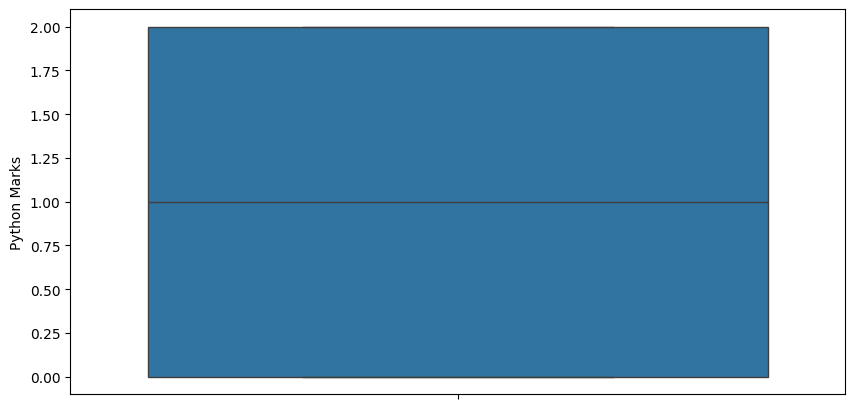

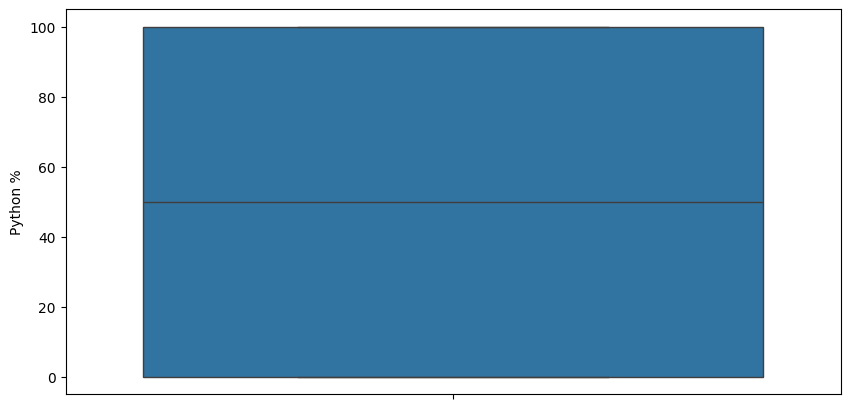

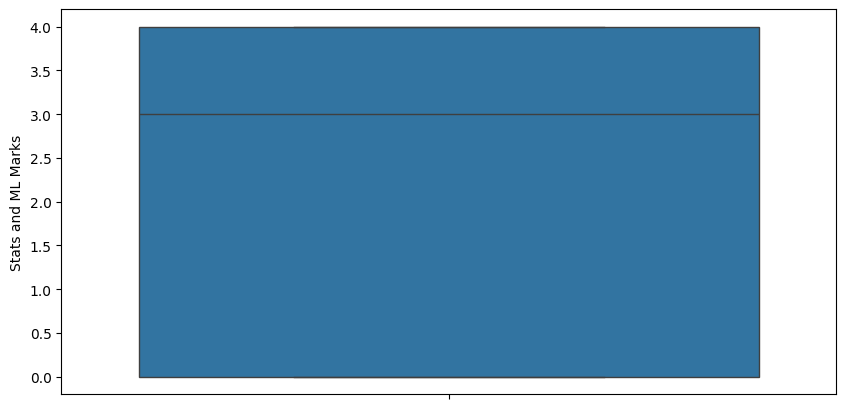

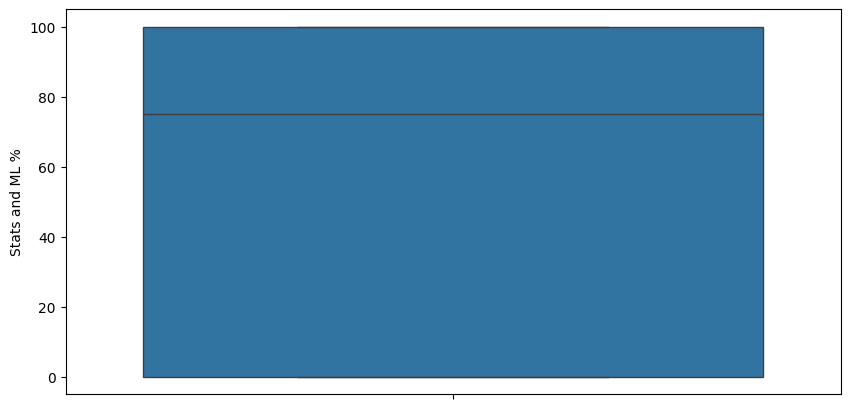

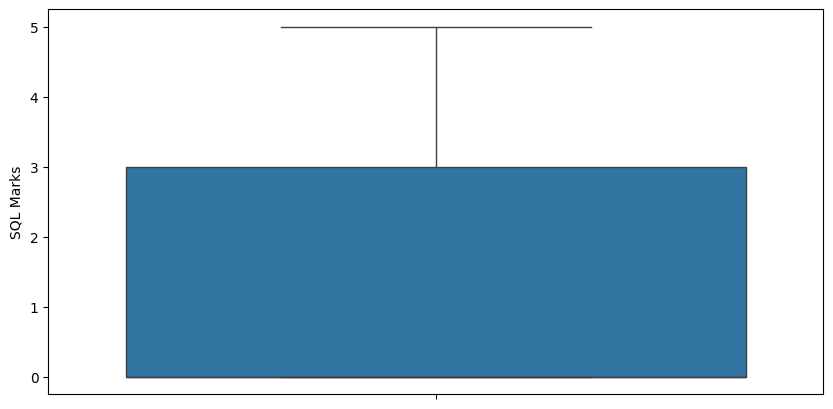

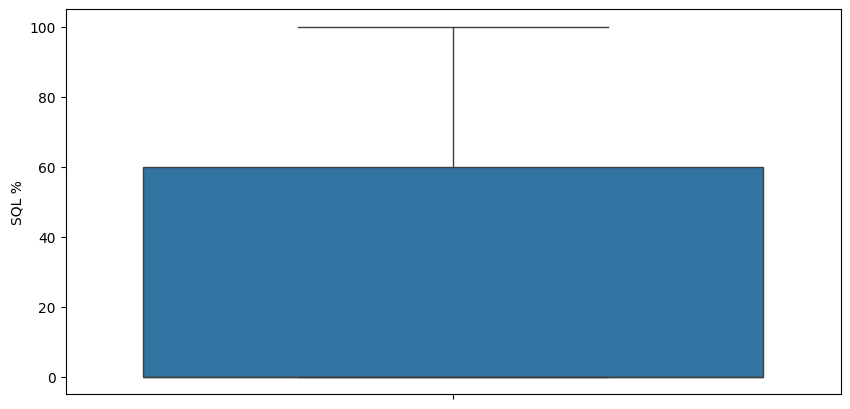

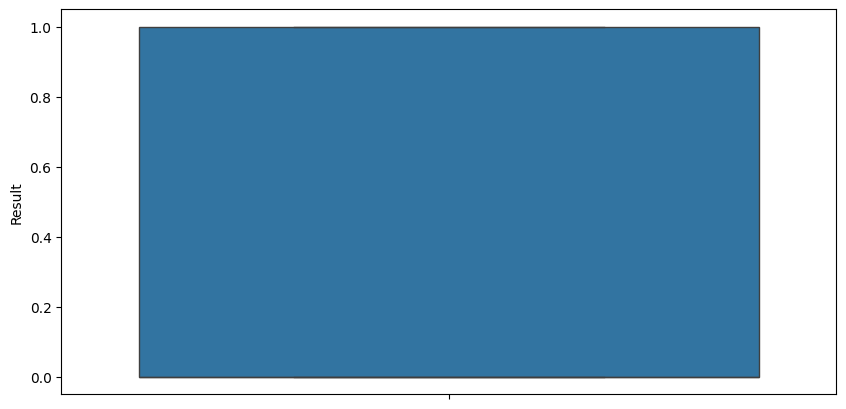

In [95]:
for i in col:
  if data1[i].dtype != 'object':
    plt.figure(figsize=(10,5))
    sns.boxplot(data1[i])
    plt.show()

No outliers present in the data, if there would have been any outlier present it would have been handled using the IQR method for which the code is mentioned below.

In [96]:
# Outlier Removal using IQR
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3 - Q1
data_cleaned = data1[~((data1 < (Q1 - 1.5 * IQR)) | (data1 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [97]:
data1

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0
2,2,100,3,75,0,0,0
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,1
141,0,0,0,0,0,0,0
142,1,50,4,100,1,20,0
143,0,0,0,0,0,0,0


In [98]:
# Feature Engineering: Adding a new feature combining the percentages
data1['Total %'] = (data1['Python %'] + data1['Stats and ML %'] + data1['SQL %']) / 3

In [99]:
data1

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Result,Total %
0,0,0,0,0,0,0,0,0.000000
1,0,0,0,0,0,0,0,0.000000
2,2,100,3,75,0,0,0,58.333333
3,0,0,0,0,0,0,0,0.000000
4,0,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,1,68.333333
141,0,0,0,0,0,0,0,0.000000
142,1,50,4,100,1,20,0,56.666667
143,0,0,0,0,0,0,0,0.000000


In [101]:
# Splitting the data into features and target variable
X = data1.drop(columns=['Result'])
y = data1['Result']

In [102]:
X

,Python Marks,Python %,Stats and ML Marks,Stats and ML %,SQL Marks,SQL %,Total %
0,0,0,0,0,0,0,0.000000
1,0,0,0,0,0,0,0.000000
2,2,100,3,75,0,0,58.333333
3,0,0,0,0,0,0,0.000000
4,0,0,0,0,0,0,0.000000
...,...,...,...,...,...,...,...
140,1,50,3,75,4,80,68.333333
141,0,0,0,0,0,0,0.000000
142,1,50,4,100,1,20,56.666667
143,0,0,0,0,0,0,0.000000


In [103]:
y

0      0
1      0
2      0
3      0
4      0
      ..
140    1
141    0
142    0
143    0
144    0
Name: Result, Length: 145, dtype: int64

In [108]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [109]:
X_scaled

array([[-1.08826457, -1.08826457, -1.34578688, ..., -0.78989089,
        -0.78989089, -1.33850902],
       [-1.08826457, -1.08826457, -1.34578688, ..., -0.78989089,
        -0.78989089, -1.33850902],
       [ 1.28464313,  1.28464313,  0.41222301, ..., -0.78989089,
        -0.78989089,  0.45146022],
       ...,
       [ 0.09818928,  0.09818928,  0.9982263 , ..., -0.21722   ,
        -0.21722   ,  0.40031824],
       [-1.08826457, -1.08826457, -1.34578688, ..., -0.78989089,
        -0.78989089, -1.33850902],
       [-1.08826457, -1.08826457, -1.34578688, ..., -0.78989089,
        -0.78989089, -1.33850902]])

In [110]:
# Feature Selection using RFE
selector = RFE(RandomForestClassifier(random_state=42), n_features_to_select=5, step=1)
X_selected = selector.fit_transform(X_scaled, y)

In [111]:
X_selected

array([[-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [ 1.28464313,  0.41222301, -0.78989089, -0.78989089,  0.45146022],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [ 1.28464313,  0.9982263 ,  1.5007927 ,  1.5007927 ,  1.52544176],
       [ 0.09818928,  0.9982263 , -0.21722   , -0.21722   ,  0.40031824],
       [-1.08826457, -0.75978358, -0.78989089, -0.78989089, -1.08279912],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [ 1.28464313,  0.9982263 ,  1.5007927 ,  1.5007927 ,  1.52544176],
       [-1.08826457, -1.34578688, -0.78989089, -0.78989089, -1.33850902],
       [ 0.09818928, -0.17378029,  1.5

In [112]:

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [116]:
# Training a Random Forest Classifier
model1 = RandomForestClassifier(random_state=42)
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [117]:
# Predicting the results on the test set
y_pred = model1.predict(X_test)

In [115]:
# Evaluating the model
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00         8

    accuracy                           1.00        29
   macro avg       1.00      1.00      1.00        29
weighted avg       1.00      1.00      1.00        29



In [118]:
accuracy_score(y_test,y_pred)

1.0